In [15]:
# Import the necesary library
import pandas as pd # For all DataFrames functions
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
!pip install unidecode

In [3]:
from unidecode import unidecode # Necessary to Remove the accents

In [4]:
def modify_df(temp_df):
  # This function will remove the accent from listed columns. After that, it fix the column type
  str_columns = ['Nomestado','Nomddr','Nomcader','Nommunicipio','Nomcicloproductivo',
  'Nommodalidad','Nomunidad','Nomcultivo']
  for col in str_columns:
      for index, row in temp_df.iterrows(): temp_df.at[index,col] = unidecode(row[col])
  return temp_df.convert_dtypes()

In [12]:
# Here I import the data and concat all the information in a single DataFrame called df_agric
link_path = 'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/'
df_agric = pd.DataFrame()
resumen = pd.DataFrame()
for year_number in range(2017,2023):
  # I add this check because the path format changes after 2021
    if year_number<2021:
      complete_path = link_path + 'Cierre_agricola_mun_' + str(year_number) + '.csv'
    else:
      complete_path = link_path + 'Cierre_agr_mun_' + str(year_number) + '.csv'
    temp_df = pd.read_csv(complete_path,encoding='latin1')
    temp_df.columns = ['Anno','Idestado','Nomestado','Idddr','Nomddr','Idcader','Nomcader',
                       'Idmunicipio','Nommunicipio','Idciclo','Nomcicloproductivo',
                       'Idmodalidad','Nommodalidad','Idunidadmedidad','Nomunidad',
                       'Idcultivo','Nomcultivo','Sembrada','Cosechada','Siniestrada',
                       'Volumenproduccion','Rendimiento','Precio','Valorproduccion']
    temp_df = modify_df(temp_df)
    df_agric = pd.concat([df_agric,temp_df],ignore_index=True)
    resume_temp = temp_df.pivot_table(index=['Anno','Nomestado','Nommunicipio'],values=
    ['Sembrada','Cosechada','Siniestrada','Volumenproduccion','Precio','Valorproduccion'])
    resumen = pd.concat([resumen,resume_temp])

<ipython-input-12-3007da3de848>:19: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  resume_temp = temp_df.pivot_table(index=['Anno','Nomestado','Nommunicipio'],values=
<ipython-input-12-3007da3de848>:11: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(complete_path,encoding='latin1')
<ipython-input-12-3007da3de848>:19: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  resume_temp = temp_df.pivot_table(index=['Anno','Nomestado','Nommunicipio'],values=


In [13]:
df_agric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205201 entries, 0 to 205200
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Anno                205201 non-null  Int64  
 1   Idestado            205201 non-null  Int64  
 2   Nomestado           205201 non-null  string 
 3   Idddr               205201 non-null  Int64  
 4   Nomddr              205201 non-null  string 
 5   Idcader             205201 non-null  Int64  
 6   Nomcader            205201 non-null  string 
 7   Idmunicipio         205201 non-null  Int64  
 8   Nommunicipio        205201 non-null  string 
 9   Idciclo             205201 non-null  Int64  
 10  Nomcicloproductivo  205201 non-null  string 
 11  Idmodalidad         205201 non-null  Int64  
 12  Nommodalidad        205201 non-null  string 
 13  Idunidadmedidad     205201 non-null  Int64  
 14  Nomunidad           205201 non-null  string 
 15  Idcultivo           205201 non-nul

In [14]:
resumen.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14607 entries, (2017, 'Aguascalientes', 'Aguascalientes') to (2022, 'Zacatecas', 'Zacatecas')
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cosechada          14607 non-null  Float64
 1   Precio             14607 non-null  Float64
 2   Sembrada           12173 non-null  Float64
 3   Siniestrada        14607 non-null  Float64
 4   Valorproduccion    14607 non-null  Float64
 5   Volumenproduccion  12163 non-null  Float64
dtypes: Float64(6)
memory usage: 911.6+ KB


In [21]:
# I will create a function that extract the top 10 elements from a list
def top_10(lista):
    #Counting the number of each type in "lista". It returns a dictionary
    clase_count = Counter(lista)
    # Sorting the dictionary by the values
    sorted_clases = sorted(clase_count.items(),key=lambda x:x[1])
    # Obtain the 10 largest values
    sorted_firsts=dict(sorted_clases[-10:])
    return sorted_firsts

**Principales Cultivos**

In [22]:
principales_cultivos = top_10(df_agric['Nomcultivo'])
principales_cultivos

{'Calabacita': 4417,
 'Alfalfa verde': 4521,
 'Tomate verde': 4603,
 'Chile verde': 5266,
 'Pastos y praderas': 5589,
 'Sorgo grano': 5916,
 'Tomate rojo (jitomate)': 7401,
 'Avena forrajera en verde': 9048,
 'Frijol': 16955,
 'Maiz grano': 27668}

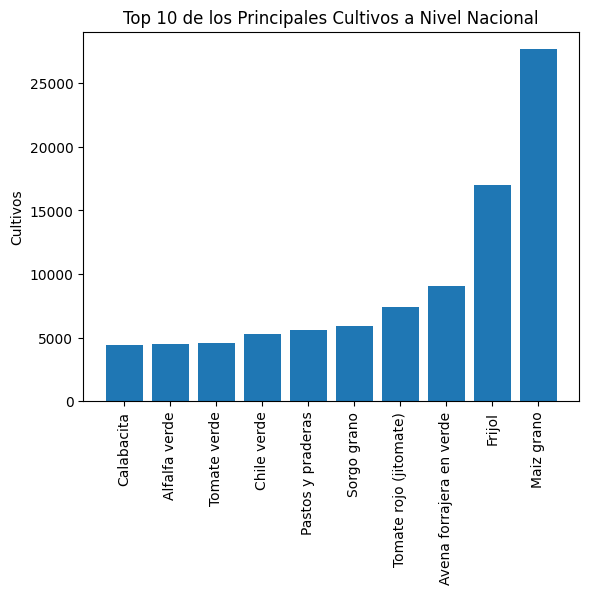

In [24]:
# Preparing the graphic
xvalues = principales_cultivos.keys()
yvalues = principales_cultivos.values()

fig = plt.figure()
plt.bar(xvalues,yvalues)
plt.xticks(range(len(xvalues)), xvalues,rotation=90)
plt.ylabel('Cultivos')
plt.title('Top 10 de los Principales Cultivos a Nivel Nacional')
plt.show()